# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
# Parse the website
html = browser.html
soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = soup.find('table', class_='table')  

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list

# Initialize lists to store data
id_list, terrestrial_date_list, sol_list, ls_list, \
month_list, min_temp_list, pressure_list = [], [], [], [], [], [], []

# Loop through the scraped data to create a list of rows
rows= table.find_all('tr')
#skip the header row
for row in rows[1:]: 
    columns = row.find_all('td')
    
    id, terrestrial_date, sol, ls, month, min_temp,\
    pressure = [column.text.strip() for column in columns]
    
    #Extract data from each column
    id_list.append(id)
    terrestrial_date_list.append(terrestrial_date)
    sol_list.append(sol)
    ls_list.append(ls)
    month_list.append(month)
    min_temp_list.append(min_temp)
    pressure_list.append(pressure)

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

import pandas as pd

mars_weather_df = pd.DataFrame({
    'id': id_list,
    'terrestrial_date': terrestrial_date_list,
    'sol': sol_list,
    'ls': ls_list,
    'month': month_list,
    'min_temp': min_temp_list,
    'pressure': pressure_list
})   
    

In [8]:
# Confirm DataFrame was created successfully
mars_weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
mars_weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
mars_weather_df['terrestrial_date']= pd.to_datetime(mars_weather_df['terrestrial_date'])
mars_weather_df['sol']= pd.to_numeric(mars_weather_df['sol'])
mars_weather_df['ls']= pd.to_numeric(mars_weather_df['ls'])
mars_weather_df['month']= pd.to_numeric(mars_weather_df['month'])
mars_weather_df['min_temp']= pd.to_numeric(mars_weather_df['min_temp'])
mars_weather_df['pressure']= pd.to_numeric(mars_weather_df['pressure'])

In [11]:
# Confirm type changes were successful by examining data types again
mars_weather_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
monthly_counts = mars_weather_df['month'].value_counts()
monthly_counts.sort_index()

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64

In [13]:
# 2. How many Martian days' worth of data are there?
num_sols = mars_weather_df['sol'].nunique()
num_sols

1867

In [14]:
# 3. What is the average low temperature by month?
aver_low_month = mars_weather_df.groupby('month')['min_temp'].mean()
aver_low_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

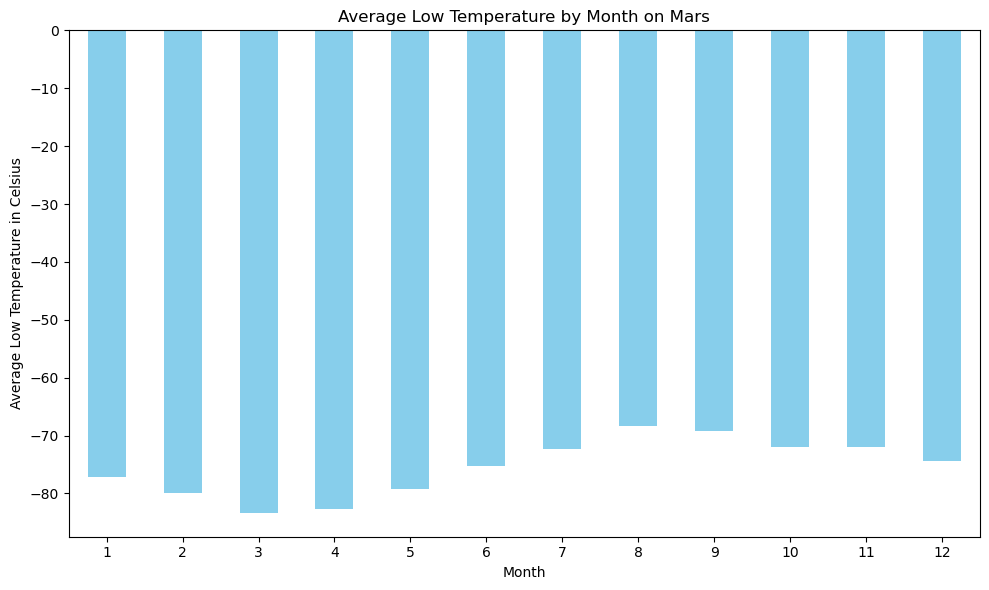

In [15]:
# Plot the average temperature by month

plt.figure(figsize=(10, 6))
aver_low_month.plot(kind ='bar', color = 'skyblue')
plt.title('Average Low Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature in Celsius')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show

In [16]:
# # Identify the coldest and hottest months in Curiosity's location
# coldest_month = aver_low_month.idxmin()
# hottest_month = aver_low_month.idxmax()
coldest_temp = aver_low_month.min()
hottest_temp = aver_low_month.max()
print(coldest_temp,hottest_temp)

-83.30729166666667 -68.38297872340425


In [17]:
order_by_temp = aver_low_month.sort_values()
order_by_temp

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

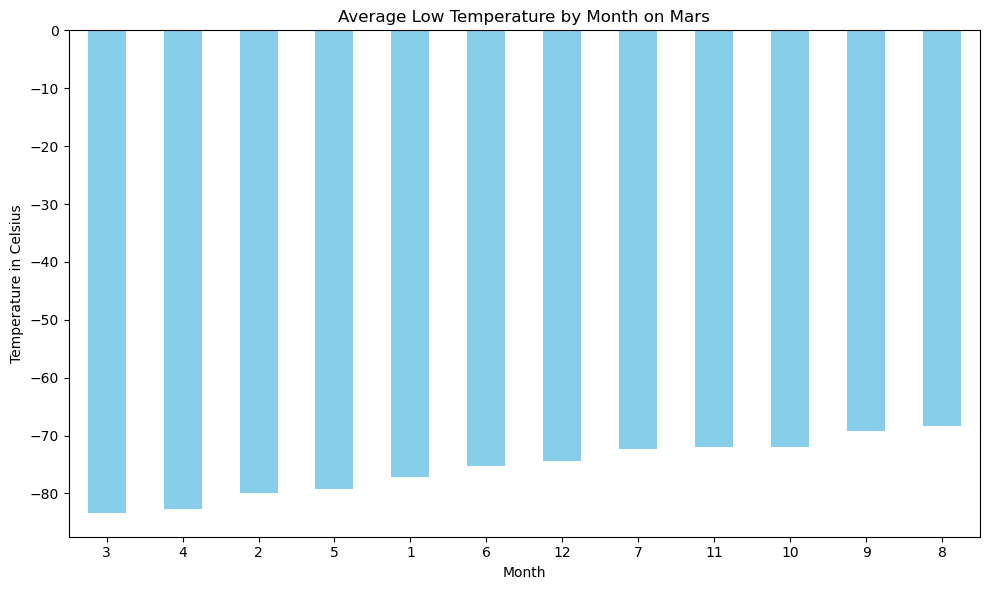

In [18]:
# Identify the coldest and hottest months in Curiosity's location
plt.figure(figsize=(10, 6))
order_by_temp.plot(kind ='bar', color = 'skyblue')
plt.title('Average Low Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show

In [19]:
mars_weather_df.columns

Index(['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'], dtype='object')

In [20]:
# 4. Average pressure by Martian month
aver_low_pressure = mars_weather_df.groupby('month')['pressure'].mean()
aver_low_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

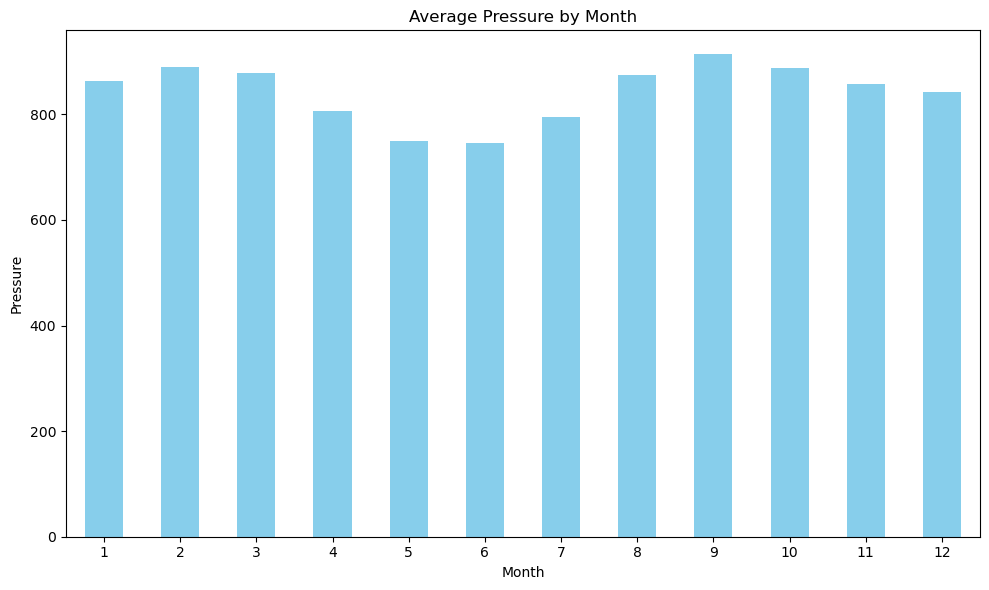

In [21]:
# Plot the average pressure by month
plt.figure(figsize=(10,6))
aver_low_pressure.plot(kind = 'bar', color ='skyblue')
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.xticks(rotation = 0)
plt.ylabel('Pressure')
plt.tight_layout()
plt.show

In [22]:
# 5. How many terrestrial (earth) days are there in a Martian year?

mars_weather_df = mars_weather_df.sort_values(by='terrestrial_date')

# Calculate the number of days since the first day
mars_weather_df['days_since_start'] = (mars_weather_df['terrestrial_date']\
                                       - mars_weather_df['terrestrial_date'].min()).dt.days

mars_weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure,days_since_start
0,2,2012-08-16,10,155,6,-75.0,739.0,0
1,13,2012-08-17,11,156,6,-76.0,740.0,1
2,24,2012-08-18,12,156,6,-76.0,741.0,2
3,35,2012-08-19,13,157,6,-74.0,732.0,3
4,46,2012-08-20,14,157,6,-74.0,740.0,4


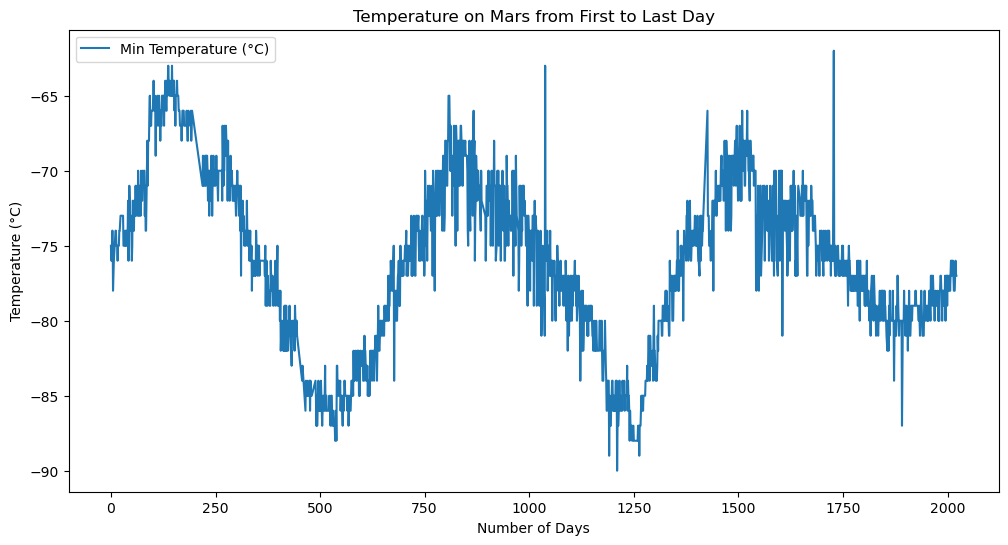

In [23]:

# Plot the temperatures
plt.figure(figsize=(12, 6))
plt.plot(mars_weather_df['days_since_start'], mars_weather_df['min_temp'], label='Min Temperature (°C)')

# Add labels and title
plt.xlabel('Number of Days')
plt.ylabel('Temperature (°C)')
plt.title('Temperature on Mars from First to Last Day')
plt.legend()  # Display legend

# Show the plot
plt.show()

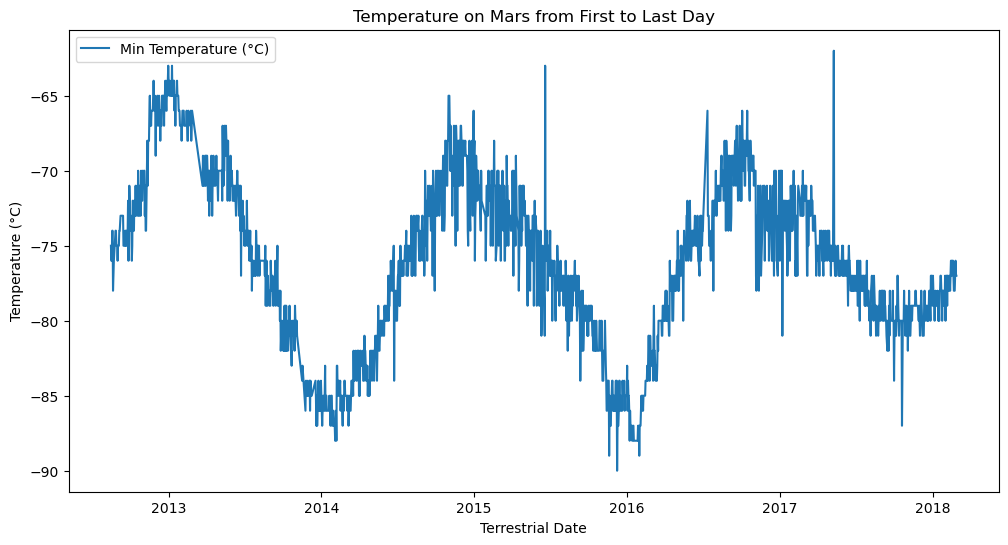

In [24]:
mars_weather_df = mars_weather_df.sort_values(by='terrestrial_date')

# Plot the temperatures
plt.figure(figsize=(12, 6))
plt.plot(mars_weather_df['terrestrial_date'], \
         mars_weather_df['min_temp'], label='Min Temperature (°C)')

# Add labels and title
plt.xlabel('Terrestrial Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature on Mars from First to Last Day')
plt.legend()  # Display legend

# Show the plot
plt.show()

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [25]:
# Write the data to a CSV
mars_weather_df.to_csv('mar_weather_data.csv', index=False)

In [26]:
browser.quit()

In [27]:
df = mars_weather_df
df.sort_values(by='terrestrial_date').head(10)

,id,terrestrial_date,sol,ls,month,min_temp,pressure,days_since_start
0,2,2012-08-16,10,155,6,-75.0,739.0,0
1,13,2012-08-17,11,156,6,-76.0,740.0,1
2,24,2012-08-18,12,156,6,-76.0,741.0,2
3,35,2012-08-19,13,157,6,-74.0,732.0,3
4,46,2012-08-20,14,157,6,-74.0,740.0,4
5,57,2012-08-21,15,158,6,-78.0,740.0,5
6,68,2012-08-22,16,158,6,-77.0,740.0,6
7,79,2012-08-23,17,159,6,-76.0,742.0,7
8,112,2012-08-27,21,161,6,-74.0,741.0,11
9,114,2012-08-28,22,162,6,-74.0,742.0,12


**1. How many days does Mars average in a month based on Earth's date?**

In [28]:
m_counts = df.groupby('month')['terrestrial_date'].count().reset_index()
round(m_counts['terrestrial_date'].mean(),0)

156.0

In [29]:
num_months_on_mars = mars_weather_df['month'].nunique()
num_months_on_mars

12

__3. What are the coldest months on Mars (at the location of Curiosity)?__

In [30]:
coldest_temp= mars_weather_df.loc[mars_weather_df['min_temp'].idxmin()]
coldest_temp[['month', 'min_temp']]

month          3
min_temp   -90.0
Name: 1093, dtype: object

__4. What are the  warmest months on Mars (at the location of Curiosity)?__

In [31]:
hottest_temp= mars_weather_df.loc[mars_weather_df['min_temp'].idxmax()]
hottest_temp[['month', 'min_temp']]

month          1
min_temp   -62.0
Name: 1582, dtype: object

__5. Find the average minimum daily temperature for all of the months.__

In [32]:
average_min_temp= mars_weather_df['min_temp'].mean()
average_min_temp

-76.12104981253347

__6. Which months have the lowest and the highest atmospheric pressure on Mars?__

In [35]:
lowest_pressure= mars_weather_df.loc[mars_weather_df['pressure'].idxmin()]
lowest_pressure[['month', 'pressure']]

month           5
pressure    727.0
Name: 1866, dtype: object

In [36]:
highest_pressure= mars_weather_df.loc[mars_weather_df['pressure'].idxmax()]
highest_pressure[['month', 'pressure']]

month           9
pressure    925.0
Name: 156, dtype: object

In [37]:
average_pressure= mars_weather_df['pressure'].mean()
average_pressure

841.0664167113016

### Step 6: Data Analyze Results

Mars follows the calendar for 12 months, with each moon being about 156 days, 5.2 times longer than Earth.  

The average minimum temperature, which is much lower than Earth on Mars, is minus 75 degrees, minus 90 degrees (March), and minus 62 degrees (January).  

In addition, the average atmospheric pressure on Mars is about 841, with a maximum of 925 and a minimum of 727, which is significantly lower than the Earth's atmospheric pressure.  

Given these conditions, Mars is not considered suitable for human habitation.